문장에 품사를 부착한 후에는 품사들을 조금 더 큰 단위의 묶음, 즉 구문으로 묶을 수 있음
형태소 분석된 결과와 nltk.chunk.regexp.RegexpParser 를 이용하여 간단하게 한국어 문장에서 명사구, 동사구, 형용사구를 찾는 법

In [1]:
import konlpy
import nltk

In [2]:
# POS tag a sentence
sentence = u'만 6세 이하의 초등학교 취학 전 자녀를 양육하기 위해서는'
words = konlpy.tag.Okt().pos(sentence)

C:\Users\EZEN\Anaconda3\lib\site-packages\jpype\_core.py:210: UserWarning: 
-------------------------------------------------------------------------------
Deprecated: convertStrings was not specified when starting the JVM. The default
behavior in JPype will be False starting in JPype 0.8. The recommended setting
for new code is convertStrings=False.  The legacy value of True was assumed for
this session. If you are a user of an application that reported this warning,
please file a ticket with the developer.
-------------------------------------------------------------------------------

  """)


In [3]:
grammar = """
NP: {<N.*>*<Suffix>?}   # Noun phrase
VP: {<V.*>*}            # Verb phrase
AP: {<A.*>*}            # Adjective phrase
"""
parser = nltk.RegexpParser(grammar)
chunks = parser.parse(words)
print("# Print whole tree")
print(chunks.pprint())

# Print whole tree
(S
  (NP 만/Noun 6/Number 세/Noun 이하/Noun)
  의/Josa
  (NP 초등학교/Noun 취학/Noun 전/Noun 자녀/Noun)
  를/Josa
  (NP 양육/Noun)
  (VP 하기/Verb)
  (NP 위/Noun)
  (VP 해서는/Verb))
None


In [4]:
print("\n# Print noun phrases only")
for subtree in chunks.subtrees():
    if subtree.label()=='NP':
        print(' '.join((e[0] for e in list(subtree))))
        print(subtree.pprint())



# Print noun phrases only
만 6 세 이하
(NP 만/Noun 6/Number 세/Noun 이하/Noun)
None
초등학교 취학 전 자녀
(NP 초등학교/Noun 취학/Noun 전/Noun 자녀/Noun)
None
양육
(NP 양육/Noun)
None
위
(NP 위/Noun)
None


In [ ]:
# Display the chunk tree
chunks.draw()


# 빈출 단어

In [4]:
from konlpy.tag import Okt
t = Okt()
import nltk

In [5]:
from konlpy.corpus import kobill
files_ko = kobill.fileids()
doc_ko = kobill.open('1809890.txt').read()

In [8]:
tokens_ko = t.nouns(doc_ko)
len(tokens_ko)

735

In [10]:
ko = nltk.Text(tokens_ko, name='대한민국 국회 의안 제 1809890호')
print(len(ko.tokens))       # returns number of tokens (document length)
print(len(set(ko.tokens)))  # returns number of unique tokens
ko.vocab()

735
250


FreqDist({'육아휴직': 38, '발생': 19, '만': 18, '이하': 18, '비용': 17, '액': 17, '경우': 16, '세': 16, '자녀': 14, '고용': 14, ...})

In [11]:
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rcParams['axes.unicode_minus'] = False   # minus 표시
plt.rcParams["font.family"] = 'Malgun Gothic'
plt.rcParams["font.size"] = 10
%matplotlib inline

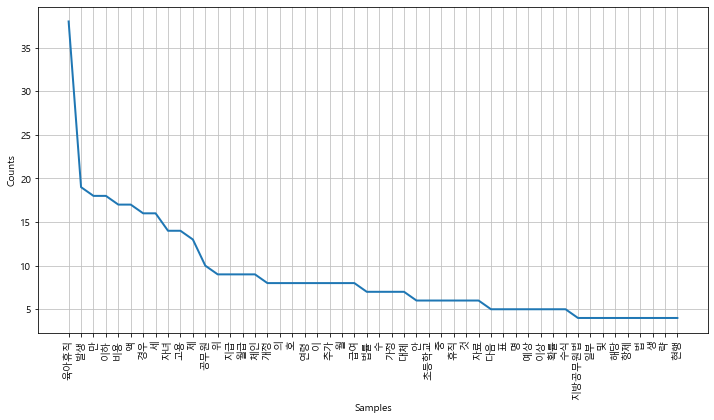

In [12]:
plt.figure(figsize=(12,6))
ko.plot(50)
plt.show()

In [49]:
stop_words = ['.', '(', ')', ',', "'", '%', '-', 'X', ').', '×','의','자','에','안','번',
              '호','을','이','다','만','로','가','를','세','액','제','위','월',
              '중','수','것','표','명','및','함','항','다음','이하','이상','생','략','해당',
              '일부','현행','가능','정','인','따라서','것임','전','중인','말','경우']

ko = [each_word for each_word in ko if each_word not in stop_words and len(each_word) > 1]

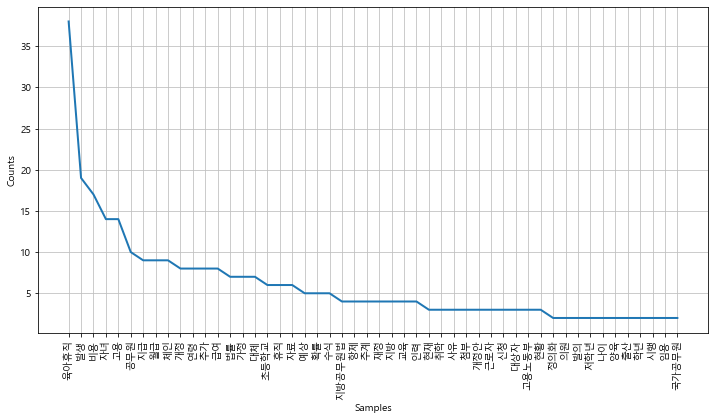

In [50]:
ko = nltk.Text(ko, name='대한민국 국회 의안 제 1809890호')

plt.figure(figsize=(12,6))
ko.plot(50)     # Plot sorted frequency of top 50 tokens
plt.show()

In [36]:
# '초등학교'가 문서 내에서 몇 번 언급되었는지
ko.count('초등학교')

6

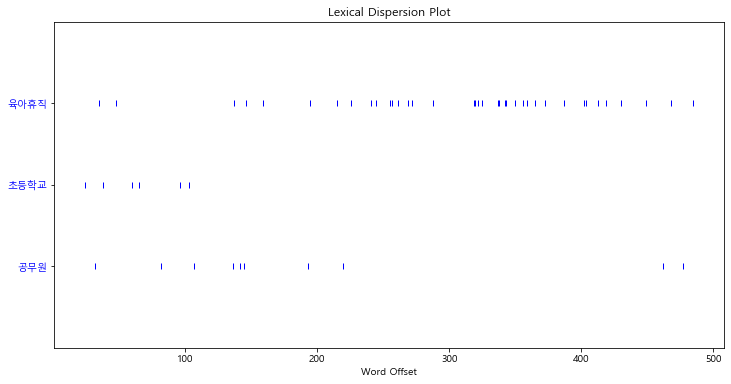

In [37]:
# 원하는 단어의 문서 내 개략적인 위치와 분량 확인
plt.figure(figsize=(12,6))
ko.dispersion_plot(['육아휴직', '초등학교', '공무원'])

In [38]:
# 원하는 단어의 주변부 단어 확인
ko.concordance('초등학교')

Displaying 6 of 6 matches:
 여상규 안규백 황영철 박영아 김정훈 김학송 의원 제안 이유 내용 초등학교 저학년 경우 부모 사랑 필요 나이 현재 공무원 자녀 양육 육아휴직
 부모 사랑 필요 나이 현재 공무원 자녀 양육 육아휴직 자녀 나이 초등학교 저학년 자녀 부모님 일자리 곧 출산 의욕 저하 문제 육아휴직 자녀
령 개정 항제 법률 지방공무원법 개정 법률 지방공무원법 개정 항제 초등학교 취학 자녀 취학 경우 초등학교 학년 자녀 부 칙 법 공포 날 시행
 개정 법률 지방공무원법 개정 항제 초등학교 취학 자녀 취학 경우 초등학교 학년 자녀 부 칙 법 공포 날 시행 신 구조 문대비 현 행 개 휴
각 호의 느 하나 사유 직 임용 휴직 다만 경우 대통령령 사정 직 초등학교 취 취학 경우 학 자녀 양육 초등학교 학년 여 여자 공무원 자녀 
다만 경우 대통령령 사정 직 초등학교 취 취학 경우 학 자녀 양육 초등학교 학년 여 여자 공무원 자녀 임신 출산 때 지방공무원법 개정 법률 


In [39]:
from wordcloud import WordCloud

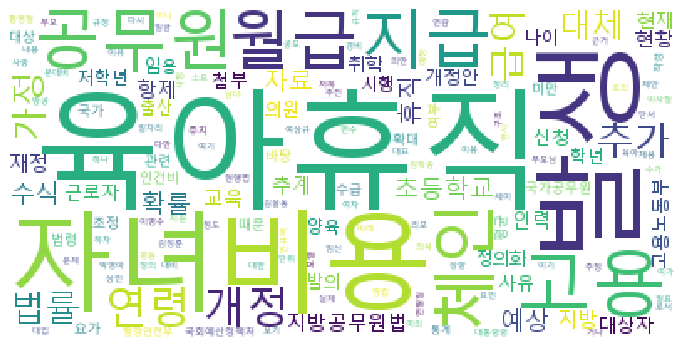

In [51]:
data = ko.vocab().most_common(150)

wordcloud = WordCloud(font_path='c:/Windows/Fonts/malgun.ttf',
                      relative_scaling = 0.2,
                      background_color='white',
                      ).generate_from_frequencies(dict(data))
plt.figure(figsize=(12,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

# Alice word cloud

In [53]:
from wordcloud import WordCloud, STOPWORDS

import numpy as np
from PIL import Image

In [55]:
text = open('data/21_alice.txt').read()
alice_mask = np.array(Image.open('data/21_alice_mask.png'))

stopwords = set(STOPWORDS)
stopwords.add("said")

In [56]:
stopwords

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'all',
 'also',
 'am',
 'an',
 'and',
 'any',
 'are',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 "can't",
 'cannot',
 'com',
 'could',
 "couldn't",
 'did',
 "didn't",
 'do',
 'does',
 "doesn't",
 'doing',
 "don't",
 'down',
 'during',
 'each',
 'else',
 'ever',
 'few',
 'for',
 'from',
 'further',
 'get',
 'had',
 "hadn't",
 'has',
 "hasn't",
 'have',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 "he's",
 'her',
 'here',
 "here's",
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 "how's",
 'however',
 'http',
 'i',
 "i'd",
 "i'll",
 "i'm",
 "i've",
 'if',
 'in',
 'into',
 'is',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'k',
 "let's",
 'like',
 'me',
 'more',
 'most',
 "mustn't",
 'my',
 'myself',
 'no',
 'nor',
 'not',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'otherwise',
 'ought',
 'our',
 'ours',
 '

In [57]:
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rcParams['axes.unicode_minus'] = False   # minus 표시
plt.rcParams["font.family"] = 'Malgun Gothic'
plt.rcParams["font.size"] = 10
%matplotlib inline

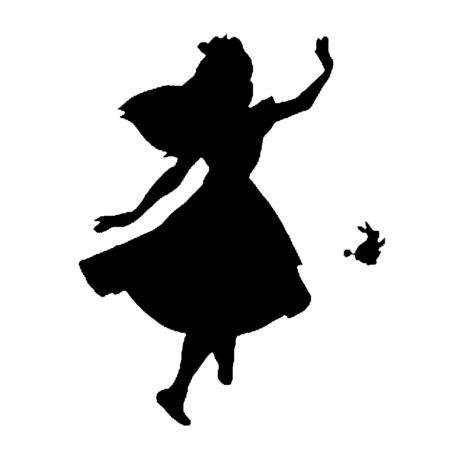

In [58]:
plt.figure(figsize=(8,8))
plt.imshow(alice_mask, cmap=plt.cm.gray, interpolation='bilinear')
plt.axis('off')
plt.show()

In [59]:
wc = WordCloud(background_color='white', max_words=2000, mask=alice_mask,
              stopwords = stopwords)
wc = wc.generate(text)
wc.words_

{'Alice': 1.0,
 'little': 0.2958904109589041,
 'one': 0.2602739726027397,
 'know': 0.2465753424657534,
 'went': 0.2273972602739726,
 'thing': 0.2191780821917808,
 'time': 0.21095890410958903,
 'Queen': 0.20821917808219179,
 'see': 0.18356164383561643,
 'King': 0.17534246575342466,
 'now': 0.1643835616438356,
 'began': 0.1589041095890411,
 'way': 0.15616438356164383,
 'Hatter': 0.15616438356164383,
 'head': 0.15342465753424658,
 'Mock Turtle': 0.15342465753424658,
 'say': 0.1506849315068493,
 'Gryphon': 0.1506849315068493,
 'well': 0.14794520547945206,
 'think': 0.14520547945205478,
 'quite': 0.14246575342465753,
 'much': 0.13972602739726028,
 'first': 0.13972602739726028,
 'go': 0.136986301369863,
 'thought': 0.13424657534246576,
 'come': 0.13150684931506848,
 'never': 0.12876712328767123,
 'voice': 0.12602739726027398,
 'looked': 0.1232876712328767,
 'got': 0.1232876712328767,
 'must': 0.12054794520547946,
 'Cat': 0.12054794520547946,
 'Mouse': 0.12054794520547946,
 'Duchess': 0.11506

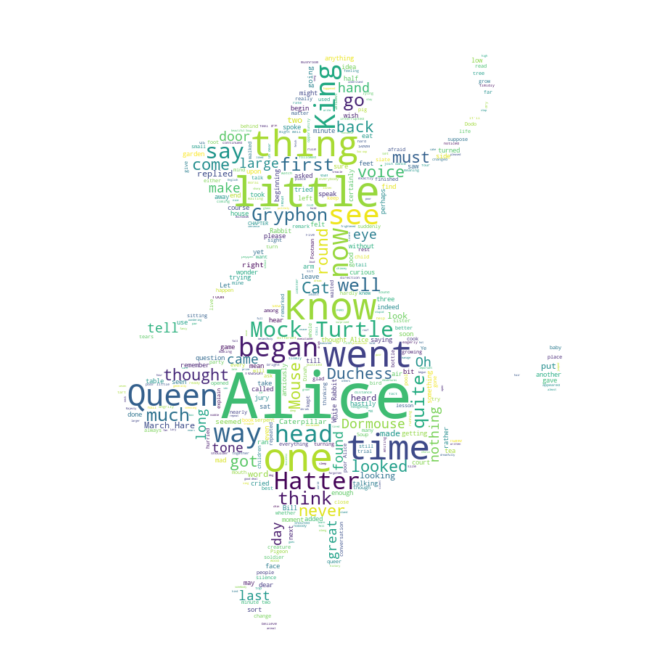

In [60]:
plt.figure(figsize=(12,12))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

# Star wars word cloud

In [62]:
text = open('data/21_a_new_hope.txt').read()

text = text.replace('HAN', 'Han')
text = text.replace("LUKE'S", 'Luke')

mask = np.array(Image.open('data/21_stormtrooper_mask.png'))

In [63]:
stopwords = set(STOPWORDS)
stopwords.add("int")
stopwords.add("ext")

In [64]:
wc = WordCloud(max_words=1000, mask=mask, stopwords=stopwords, 
               margin=10, random_state=1).generate(text)

default_colors = wc.to_array()

In [65]:
import random
def grey_color_func(word, font_size, position, orientation, 
                    random_state=None, **kwargs):
    return 'hsl(0, 0%%, %d%%)' % random.randint(60,100)

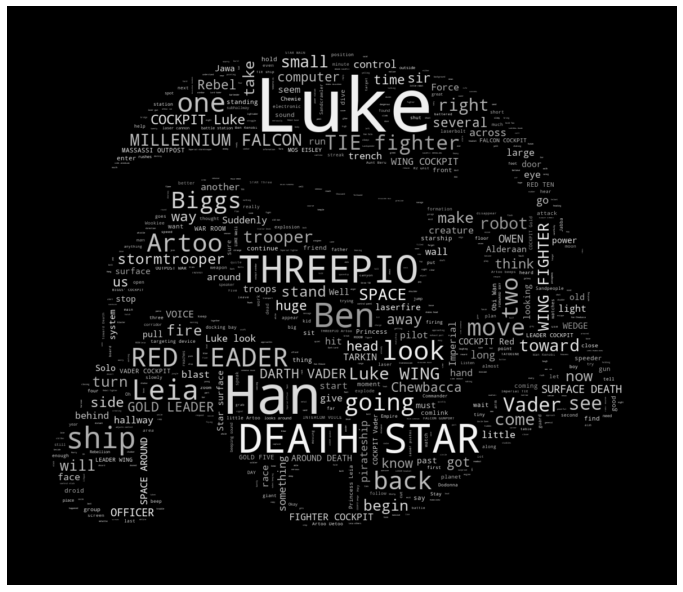

In [66]:
plt.figure(figsize=(12,12))
plt.imshow(wc.recolor(color_func=grey_color_func, random_state=3),
          interpolation='bilinear')
plt.axis('off')
plt.show()

# 여자친구 선물 고르기

In [67]:
from bs4 import BeautifulSoup 
from urllib.request import urlopen
import urllib
import time

In [68]:
tmp1 = 'https://search.naver.com/search.naver?where=kin'
html = tmp1 + '&sm=tab_jum&ie=utf8&query={key_word}&start={num}'

response = urlopen(html.format(num=1, key_word=urllib.parse.quote('여친 선물')))

soup = BeautifulSoup(response, "html.parser")

tmp = soup.find_all('dl')

tmp_list = []
for line in tmp:
    tmp_list.append(line.text)
    
tmp_list

[' 기본검색   입력한 단어가 하나이상 포함된 문서 검색  ',
 ' 상세검색  정확히 일치하는 단어/문장(" ") 반드시 포함하는 단어(+) 제외하는 단어(-)  기본검색의 결과 범위를 줄이고자 할 때 사용합니다.여러개의 단어를 입력하실 때는쉼표(,)로 구분해서 입력하세요.   ',
 ' 연관검색어도움말    파니니백   반지갑   웨스트아일랜드   질스튜어트   주얼리 브랜드   여친 생일선물   연인선물     닫기 후 1주일간 유지됩니다. 연관검색어를 다시 보시겠습니까? 열기 ',
 '  질문  여친선물로 생로랑 틴트 평이 좋아보이   2019.08.30.   여친선물로 생로랑 틴트 평이 좋아보이길래 틴트랑 이것저것 필요한걸로 좀 사줄려구 하는데요. 사는지역이 구미인데 구미에 구매 할수있는곳이 있나요? 아니면 대구 신세계...   답변 백화점에서 구매하는게 좋습니다 일단 다른 오프매장은 마땅히 구매할 만한 곳이 없구요! 또 유통채널들 중에서 가장 다양하게 틴트 라인업 보유하고 있고 재고가 충분히...      ',
 '  질문  생리기간 여친선물 줄만한거   2018.12.18.   여친이 생리기간만 되면 너무 힘들어하는데 그럴때 줄만한 여친선물 있을까요ㅠㅠ? 간단한거라도 좋아용..생리기간에 힘내라고 여친선물 주고싶어서요   답변 생리기간에는 예민해서 여친선물로 여자친구가 조아하는걸로 주는게 좋을거 같아요 생리기간 잘 이겨내도록 좋은 여친선물 고르세요!      ',
 '  질문  10대 여친 선물   2019.10.18.   이제 기념일이 다가와서 그런데요 여자친구한테 무슨 선물하는게 좋을까요?? 향수 말고요..ㅎ 자세히 알려주세용^^   답변 토닥토닥워터 너의이름은장미를 추천해요 장미와 건조레몬, 딸기 등이 블랜딩 되어 있어 상큼하고 맛있게 먹을수 있어요 간편하게 보틀에 우려 마시면 되고...      ',
 '  질문  여친 선물   2019.10.11.   여자들이 좋아할만한 선물이 무엇이 있나요?? 곧 200일이라...   답변 안녕하세요 수

In [71]:
from tqdm import tqdm_notebook

present_candi_text = []
for n in tqdm_notebook(range(1, 1000, 10)):
    response = urlopen(html.format(num=n, key_word=urllib.parse.quote('여자 친구 선물')))
    soup = BeautifulSoup(response, "html.parser")
    tmp = soup.find_all('dl')
    for line in tmp:
        present_candi_text.append(line.text)
        
    time.sleep(0.5)

In [72]:
with open("data/21_present_candi.txt", "w") as f:
    for line in present_candi_text:
        f.write(line+'\n')

In [73]:
len(present_candi_text)

1300

In [75]:
present_text = ''

for each_line in present_candi_text[:10000]:
    present_text = present_text + each_line + '\n'

In [76]:
from konlpy.tag import Okt
t = Okt()

In [77]:
tokens_ko = t.morphs(present_text)
tokens_ko

['기본',
 '검색',
 '입력',
 '한',
 '단어',
 '가',
 '하나',
 '이상',
 '포함',
 '된',
 '문서',
 '검색',
 '상세',
 '검색',
 '정확히',
 '일치',
 '하는',
 '단어',
 '/',
 '문장',
 '("',
 '")',
 '반드시',
 '포함',
 '하는',
 '단어',
 '(+)',
 '제외',
 '하는',
 '단어',
 '(-)',
 '기',
 '본',
 '검색',
 '의',
 '결과',
 '범위',
 '를',
 '줄이고자',
 '할',
 '때',
 '사용',
 '합니다',
 '.',
 '여러',
 '개',
 '의',
 '단어',
 '를',
 '입력',
 '하실',
 '때',
 '는',
 '쉼표',
 '(,)',
 '로',
 '구분',
 '해서',
 '입력',
 '하세요',
 '.',
 '연관검색어',
 '도움말',
 '여자친구',
 '목걸이',
 '스킨',
 '케어',
 '여자',
 '스킨로션',
 '추천',
 '여자',
 '30',
 '대',
 '선물',
 '에센스',
 '추천',
 '20',
 '대',
 '여자친구',
 '선물',
 '여자친구',
 '선물',
 '뷰티',
 '디바이스',
 '선물',
 '여자친구',
 '생일',
 '선물',
 '여자',
 '근력',
 '운동',
 '닫기',
 '후',
 '1',
 '주',
 '일간',
 '유지',
 '됩니다',
 '.',
 '연관검색어',
 '를',
 '다시',
 '보시겠습니까',
 '?',
 '열기',
 '질문',
 '20',
 '대',
 '여자친구',
 '선물',
 '로',
 '어떤',
 '걸',
 '해줘야',
 '할까',
 '요',
 '??',
 '2019.06',
 '.',
 '10',
 '.',
 '이번',
 '에는',
 '좀',
 '색다른',
 '걸',
 '해주고',
 '싶은데요',
 ',',
 '웬만한',
 '20',
 '대',
 '여자친구',
 '선물',
 '로',
 '해줄건',
 '다',
 '...',
 '이미',
 '줄',
 '건',
 

In [78]:
# Natural Language Toolkit
import nltk

In [79]:
ko = nltk.Text(tokens_ko, name='여자 친구 선물')
print(len(ko.tokens))
print(len(set(ko.tokens)))

94729
580


In [80]:
ko.vocab().most_common(100)

[('선물', 6561),
 ('여자친구', 6152),
 ('대', 3764),
 ('.', 3489),
 ('로', 3262),
 ('...', 2687),
 ('20', 2406),
 (',', 1473),
 ('거', 1394),
 ('답변', 1392),
 ('질문', 1098),
 ('?', 899),
 ('추천', 803),
 ('이', 799),
 ('좋은', 790),
 ('가', 709),
 ('30', 688),
 ('10', 668),
 ('것', 605),
 ('화장품', 600),
 ('좀', 587),
 ('하는', 507),
 ('고민', 502),
 ('는', 501),
 ('단어', 500),
 ('검색', 498),
 ('를', 498),
 ('다', 497),
 ('에', 495),
 ('뭐', 494),
 ('!', 493),
 ('걸', 492),
 ('너무', 484),
 ('을', 419),
 ('한', 407),
 ('여자', 402),
 ('괜찮은', 400),
 ('요', 398),
 ('좋을까요', 398),
 ('어떤', 396),
 ('적', 396),
 ('해주세요', 395),
 ('줄', 394),
 ('인', 394),
 ('지갑', 394),
 ('알려', 392),
 ('여러', 391),
 ('라', 389),
 ('제', 307),
 ('의', 302),
 ('입력', 300),
 ('하나', 300),
 ('2019.06', 298),
 ('중', 298),
 ('게', 298),
 ('개', 296),
 ('목걸이', 296),
 ('은', 296),
 ('만', 296),
 ('해주고', 294),
 ('2019.08', 294),
 ('30만원', 294),
 ('정도', 294),
 ('친환경', 294),
 ('스킨', 293),
 ('생일', 293),
 ('알려주세요', 212),
 ('많이', 212),
 ('도', 209),
 ('저', 208),
 ('나', 205),
 (

In [81]:
ko.similar('여자친구')

In [96]:
stop_words = ['.','가','요','답변','...','을','수','에','질문','제','를','이','도','인',
              '좋','1','는','로','으로','2','것','은','다',',','니다','대','들','걸','해서',
              '2019','들','데','..','의','때','겠','고','게','네요','한','일','할','많이',
              '10','?','하는','06','주','려고','인데','거','좀','는데','~','ㅎㅎ','알려',
              '하나','이상','20','뭐','까','있는','잘','습니다','다면','했','주려','좋은',
              '지','있','못','후','중','줄','6','과','어떤','기본','!!','!','??','입니다',
              '단어','선물해','라고','중요한','합','가요','....','보이','네','무지','안',
              '2019.05','2019.06','100일','27','됩니다','너무','이런','괜찮은','저','검색',
              '해주고','적','안녕하세요','하기','연관검색어','싶은데','보','니까','거기','서',
              '합니다','좋을까요','기억','준비','하고','이번','아닐까','있는데요','2019.07',
              '건','주는','있으면','면','이나','해주세요','대한','해주면','살','된','때문',
              '남을만한','상세','정확히','일치','/','("','")','반드시','(+)','(-)','(,)',
              '반드시','기','기','결과','줄이고자','하실','여러','개','쉼표','하세요','고민',
              '여자친구','선물','추천', '30','여자','라','만','입력','2019.08']

In [97]:
tokens_ko = [each_word for each_word in tokens_ko 
                            if each_word not in stop_words]

ko = nltk.Text(tokens_ko, name='여자 친구 선물')
ko.vocab().most_common(50)

[('화장품', 600),
 ('지갑', 394),
 ('목걸이', 296),
 ('30만원', 294),
 ('정도', 294),
 ('친환경', 294),
 ('스킨', 293),
 ('생일', 293),
 ('알려주세요', 212),
 ('나', 205),
 ('실용', 202),
 ('가격', 202),
 ('뭘', 202),
 ('여친', 201),
 ('포함', 200),
 ('할까', 200),
 ('향수', 200),
 ('더', 198),
 ('가방', 198),
 ('등등', 196),
 ('기념일', 196),
 ('부담', 196),
 ('없는', 196),
 ('같은', 196),
 ('경우', 196),
 ('13', 196),
 ('후반쯤', 196),
 ('40초', 196),
 ('브랜드', 196),
 ('명품', 196),
 ('으로는', 196),
 ('구입', 196),
 ('처음', 196),
 ('그', 193),
 ('노아', 193),
 ('퓨어', 193),
 ('플라워', 193),
 ('로션', 193),
 ('주기', 193),
 ('로는', 190),
 ('그동안', 109),
 ('해줘야', 107),
 ('사용', 104),
 ('했는데', 103),
 ('싶은데요', 102),
 ('해', 102),
 ('에서', 102),
 ('해주려고', 102),
 ('문서', 100),
 ('문장', 100)]

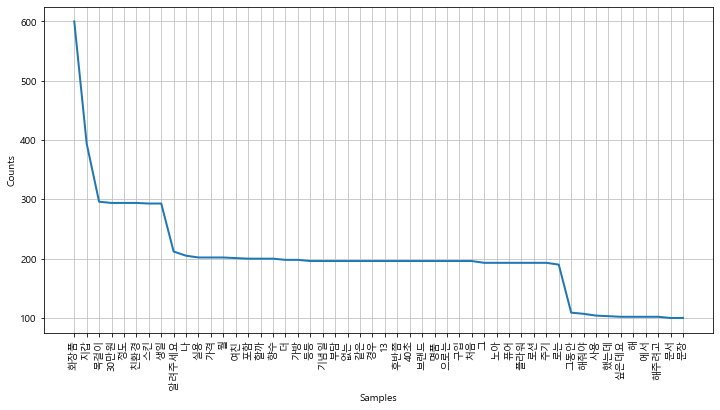

In [98]:
plt.figure(figsize=(12,6))
ko.plot(50) 
plt.show()

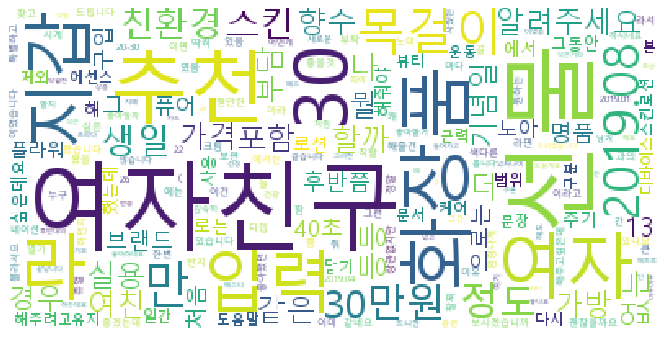

In [86]:
data = ko.vocab().most_common(300)

wordcloud = WordCloud(font_path='c:/Windows/Fonts/malgun.ttf',
                      relative_scaling = 0.2,
                      #stopwords=STOPWORDS,
                      background_color='white',
                      ).generate_from_frequencies(dict(data))
plt.figure(figsize=(12,6))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [87]:
mask = np.array(Image.open('data/21_heart.jpg'))

from wordcloud import ImageColorGenerator
image_colors = ImageColorGenerator(mask)

In [88]:
data = ko.vocab().most_common(200)

wordcloud = WordCloud(font_path='c:/Windows/Fonts/malgun.ttf',
               relative_scaling = 0.1, mask=mask,
               background_color = 'white',
               min_font_size=1,
               max_font_size=100).generate_from_frequencies(dict(data))

default_colors = wordcloud.to_array()

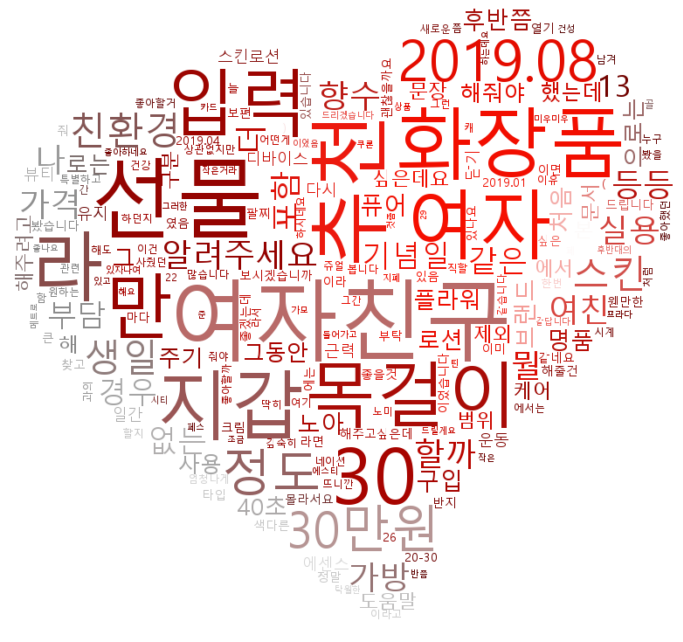

In [89]:
plt.figure(figsize=(12,12))
plt.imshow(wordcloud.recolor(color_func=image_colors), interpolation='bilinear')
plt.axis('off')
plt.show()